# 6.5 Unsupervised Machine Learning

1 Import Data and Libraries
2 Elbow Techniqe 
3 Kmeans algorithm
4 Plot different variables against each other
5 Descriptive Statistics 

# 1 Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# import Data
df = pd.read_csv(r'C:\Users\419182\OneDrive - JELDWEN Inc\Desktop\Data Analytics\Clean2019BattingData3.csv', low_memory = False)

In [4]:
# check shape and columns
df.shape

(69920, 58)

In [5]:
df.columns

Index(['Player', 'Batting.Order', 'Pos', 'AB', 'R', 'H', 'RBI', 'BB', 'SO',
       'Plate App', 'BA', 'OBP', 'SLG', 'OPS', 'Pitches Seen', 'Strikes Seen',
       'WPA', 'RE24', 'Put Out', 'Assists', 'Details', 'X2B', 'X3B', 'HR',
       'Intentional Walk', 'Sac Fly', 'GDP', 'SB', 'CS', 'HBP', 'Sac Bunt',
       'Team', 'Team.Abbrev', 'Opponent', 'Opponent.Abbrev', 'Team.R',
       'Team.H', 'Team.E', 'Opponent.R', 'Opponent.H', 'Opponent.E', 'Innings',
       'Game.ID', 'Date', 'Game.Time', 'H.A', 'Sky', 'Stadium', 'Temperature',
       'Weather', 'Wind.Direction', 'Wind.Speed', 'Double.Header',
       'Precipitation', 'Location', 'Game Region', 'State', 'Total.R'],
      dtype='object')

In [6]:
# create dataframe with numerical values I want to include
df2 = df[[ 'H', 'Opponent.H', 'Team.H', 'Opponent.R', 'Team.R', 'Opponent.E', 'Team.E', 'Total.R', 'Wind.Speed', ]]

I know that because some players are pitchers, there could be missing data in many of the player stat columns.  This is why I chose to use only hits, numerical environment variable: temp, and team stats. 

In [7]:
# check for nulls
df2.isnull().sum()

H              0
Opponent.H     0
Team.H         0
Opponent.R     0
Team.R         0
Opponent.E     0
Team.E         0
Total.R        0
Wind.Speed     0
Temperature    0
dtype: int64

Because I cleaned the data earlier, I know that most of these columns will have relatively lower ranges.  I will however check a few in question.

In [8]:
# check values 
df2['Wind.Speed'].value_counts()

0     11211
7      6261
8      5969
9      5863
6      5740
10     5060
5      4174
11     3989
4      3151
12     2868
13     2844
14     2171
3      2104
15     1932
2      1409
16     1376
17     1052
18      862
1       704
19      329
20      307
21      172
22      140
23       87
25       56
24       35
27       29
26       25
Name: Wind.Speed, dtype: int64

In [11]:
# check data type
df2['Temperature'].dtype

dtype('int64')

In [12]:
# check values 
df2['Temperature'].value_counts()

72     4722
73     4548
68     3115
76     3095
75     3047
       ... 
42       58
41       57
35       30
38       30
102      29
Name: Temperature, Length: 66, dtype: int64

Since the differnce in ranges between variables is not very large, I believe it should be good to move forward with the analysis.

In [13]:
# check 
df2.columns

Index(['H', 'Opponent.H', 'Team.H', 'Opponent.R', 'Team.R', 'Opponent.E',
       'Team.E', 'Total.R', 'Wind.Speed', 'Temperature'],
      dtype='object')

# 2 Elbow Technique 

In [14]:
# define range of clusters and k-means
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# create score that represents rate of variation
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

In [16]:
# output 
score

[-14595830.931478579,
 -9921094.904470187,
 -8109525.227572181,
 -6877412.448211437,
 -6319494.296906602,
 -5816788.029707344,
 -5446623.062968014,
 -5150733.1287207175,
 -4913690.520227718]

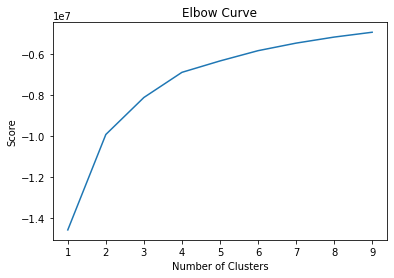

In [17]:
# plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this graph, there is a large jump from 2 to 4 and straigtens out after 4, so I will use 4 as the optimal count of clusters. 

# 3 Kmeans Algorithm 

In [18]:
# create kmeans object
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [19]:
# fit kmeans object to data
kmeans.fit(df2)

C:\Users\419182\Newanaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [20]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\419182\Newanaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\419182\AppData\Local\Temp/ipykernel_25676/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [21]:
# check
df2.head()

,H,Opponent.H,Team.H,Opponent.R,Team.R,Opponent.E,Team.E,Total.R,Wind.Speed,Temperature,clusters
0,0,7,9,9,7,1,0,16,0,72,1
1,2,7,9,9,7,1,0,16,0,72,1
2,1,7,9,9,7,1,0,16,0,72,1
3,1,7,9,9,7,1,0,16,0,72,1
4,2,7,9,9,7,1,0,16,0,72,1


In [22]:
# check
df2['clusters'].value_counts()

0    25301
3    17473
1    14745
2    12401
Name: clusters, dtype: int64

# 4 Plot Different Variables Against Each Other 

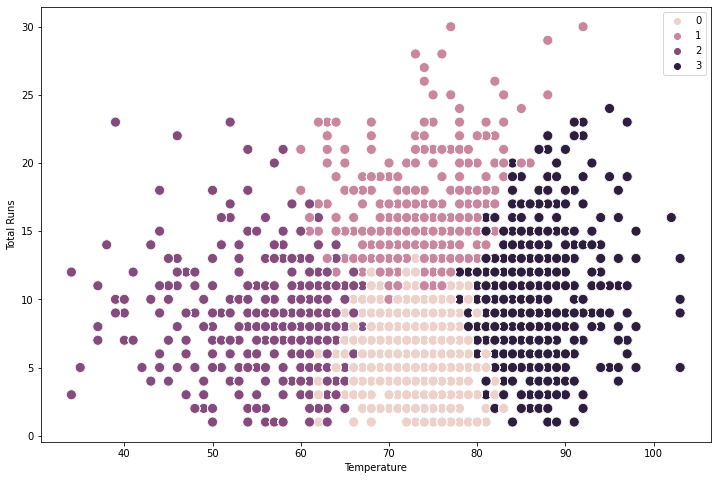

In [23]:
# plot temperature and total runs 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Temperature'], y=df2['Total.R'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Temperature') 
plt.ylabel('Total Runs') 
plt.show()

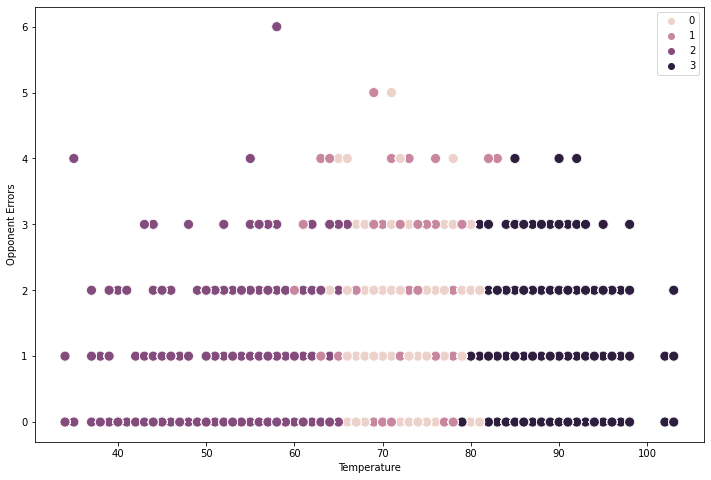

In [24]:
# plot temperature and opponent Errors 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Temperature'], y=df2['Opponent.E'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Temperature') 
plt.ylabel('Opponent Errors') 
plt.show()

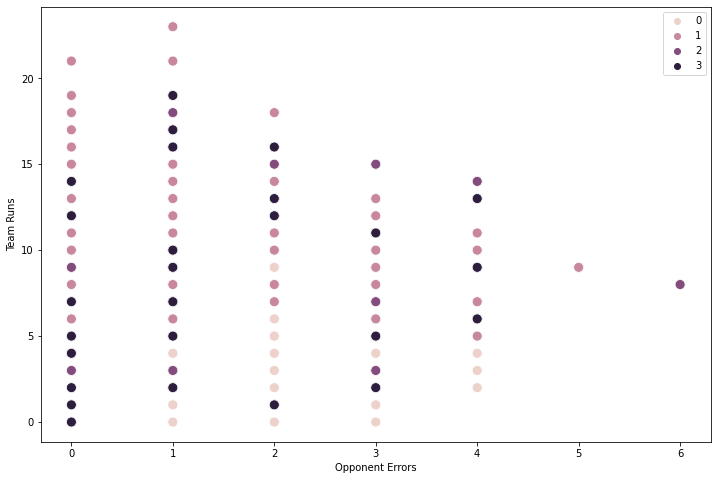

In [25]:
# plot opponent Errors and team runs 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Opponent.E'], y=df2['Team.R'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Opponent Errors') 
plt.ylabel('Team Runs') 
plt.show()

For the first plot: temperature and total runs, it is pretty interesting.  There is a cluster (0-light pink)  that represents temperatures in the moderate zone from around 62-83 degrees that have lower team runs scored than group 1, who has higher runs scored in those temperatures.  Naturally, I believe we assume that the ball would travel further in hotter weather, but based on this plot, the differnce might instead be the humidty instead of temperature.  It might be something to dig into further.  The next plot, temperature and opponent errors indicates that temperature might not have as big of an impact on errors as some may think.  Again, addutional factors may contribute.  Last, the opponent errors and team runs clusters are all mixed within the plot.  This data may need further explanation, but it appears errors in group 0-light pink, did not contribute to more than 10 runs by any team.  

# 5 Descriptive Statistics

In [30]:
# create loc 
df2.loc[df2['clusters'] == 3, 'cluster'] = 'black'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
# use groupby
df2.groupby('cluster').agg({'Temperature':['mean', 'median'], 
                         'Opponent.E':['mean', 'median'], 
                         'Team.R':['mean', 'median'],
                          'Total.R':['mean', 'median']})

Temperature        Opponent.E           Team.R           Total.R  \
                   mean median       mean median      mean median       mean   
cluster                                                                        
black         85.809535   85.0   0.624735    0.0  4.959137    5.0  10.025010   
dark purple   57.229094   59.0   0.605516    0.0  4.296428    4.0   8.689944   
pink          72.720643   73.0   0.513023    0.0  3.399391    3.0   6.834987   
purple        73.197898   73.0   0.721668    1.0  7.796134    8.0  15.682604   

                    
            median  
cluster             
black         10.0  
dark purple    9.0  
pink           7.0  
purple        15.0

Black cluster has the highest temperatures, second most opponent errors, second most team runs, and second most total runs.  It indicates that runs could be scored in the heat, bit not as many as the purple cluster's lower mean temps and highest run means for both team and total.  The highest opponent errors occured in temperate climate (mean 73 degrees).  This inidcates what was previously seen on the plot, that temp may not impact errors.  Lowest temps, cluster dark purple did see the lowest average team runs, but not the lowest total runs.  This could indicate that the weather impacts either the opposing team or the home team differnetly depending on the ball park. It is great to see these team stats, for future steps, these could indicate the performance of individual players based on weather/ temperature. 